## Input Preparation - Full Images
In this notebook, take directories of sea lion image chips and convert them to format ready for machine learning training.

In [1]:
import cv2
import pathlib
import pickle
import random
import pandas as pd
import matplotlib.pyplot as plt

##### Use pathlib to inspect files in the bbox_chips directory, and glob together one list of all the images....
*** 
On multiple runs, the pkl files grew too large so editing code to take 2000 chips of each class.

In [2]:
classes = ['adult_females', 'adult_males', 'juveniles', 'pups', 'subadult_males']

In [3]:
images_root = pathlib.Path('../../data/TrainSmall2/Train/')
images = list(images_root.glob('*.jpg'))
images

[WindowsPath('../../data/TrainSmall2/Train/41.jpg'),
 WindowsPath('../../data/TrainSmall2/Train/42.jpg'),
 WindowsPath('../../data/TrainSmall2/Train/43.jpg'),
 WindowsPath('../../data/TrainSmall2/Train/44.jpg'),
 WindowsPath('../../data/TrainSmall2/Train/45.jpg'),
 WindowsPath('../../data/TrainSmall2/Train/46.jpg'),
 WindowsPath('../../data/TrainSmall2/Train/47.jpg'),
 WindowsPath('../../data/TrainSmall2/Train/48.jpg'),
 WindowsPath('../../data/TrainSmall2/Train/49.jpg'),
 WindowsPath('../../data/TrainSmall2/Train/50.jpg')]

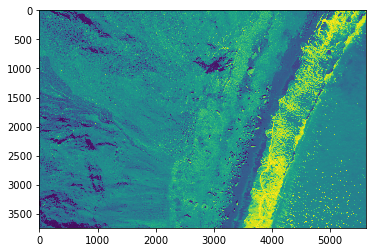

In [4]:
def img_to_array(img_path):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(5616,3744))
    return img

test = img_to_array(images[0])
plt.imshow(test)

In [5]:
image_arrays = [img_to_array(i) for i in images]
image_arrays[0].shape

(3744, 5616)

In [6]:
for i in image_arrays:
    print(i.shape)

(3744, 5616)
(3744, 5616)
(3744, 5616)
(3744, 5616)
(3744, 5616)
(3744, 5616)
(3744, 5616)
(3744, 5616)
(3744, 5616)
(3744, 5616)


##### Create label index codes. Get names from the folder directories.

In [7]:
label_df = pd.read_csv('../../data/TrainSmall2/Train/train.csv',index_col='train_id')
label_df = label_df.iloc[range(41,51)]
label_df

,adult_males,subadult_males,adult_females,juveniles,pups
train_id,,,,,
41,15,0,85,18,59
42,7,4,10,1,0
43,28,4,338,47,189
44,3,2,25,15,0
45,4,7,100,27,0
46,1,4,0,0,0
47,13,16,48,3,33
48,5,10,66,24,0
49,0,0,4,15,0


In [8]:
labels = [(row.adult_males,
          row.subadult_males,
          row.adult_females,
          row.juveniles,
          row.pups)
         for ix, row 
          in label_df.iterrows()]

In [9]:
labels

[(15, 0, 85, 18, 59),
 (7, 4, 10, 1, 0),
 (28, 4, 338, 47, 189),
 (3, 2, 25, 15, 0),
 (4, 7, 100, 27, 0),
 (1, 4, 0, 0, 0),
 (13, 16, 48, 3, 33),
 (5, 10, 66, 24, 0),
 (0, 0, 4, 15, 0),
 (1, 0, 0, 0, 0)]

##### Save image labels and image arrays to pickles for next step - machine learning model training and testing!

In [10]:
with open('full_image_labels.pkl', 'wb') as f:
    pickle.dump(labels, f)
with open('full_image_arrays.pkl', 'wb') as f:
    pickle.dump(image_arrays, f)

## Move onto next notebook - we will load these pkl files in to retrieve our labels and arrays.

In [12]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
[load_img(i), grayscale=True, color_mode='rgb', ]